In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


df = pd.read_csv("SVMtrain.csv")


In [3]:
print("Shape of data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe(include='all'))

Shape of data: (889, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB
None

Describe:
        PassengerId    Survived      Pclass   Sex         Age       SibSp  \
count    889.000000  889.000000  889.000000   889  889.000000  889.000000   
unique          NaN         NaN         NaN     2         NaN         NaN   
top             NaN         NaN         NaN  Male         NaN         NaN   
freq            

In [5]:
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

In [9]:
df['Age'] = df['Age'].fillna("Unknown")

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


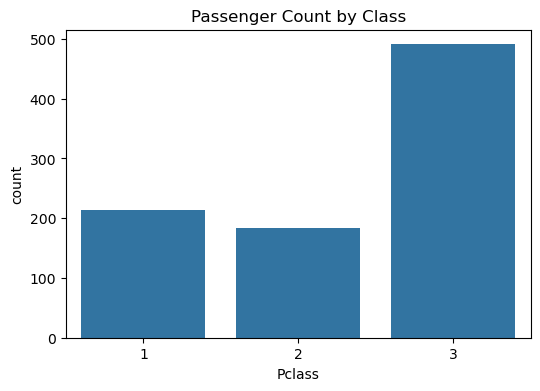

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.show()

In [17]:
female_survived = df[(df['Sex']=='female') & (df['Survived']==1)]
print("\nFemale passengers who survived (PassengerId):")
print(female_survived[['PassengerId','Sex','Survived']])



Female passengers who survived (PassengerId):
     PassengerId     Sex  Survived
1              2  female         1
2              3  female         1
3              4  female         1
8              9  female         1
9             10  female         1
..           ...     ...       ...
872          875  female         1
873          876  female         1
877          880  female         1
878          881  female         1
885          888  female         1

[231 rows x 3 columns]


In [19]:
third_class_under18 = df[(df['Pclass']==3) & (df['Age']<18)]
print("\nPassengers in 3rd class under age 18:")
print(third_class_under18[['PassengerId','Pclass','Age']])


Passengers in 3rd class under age 18:
     PassengerId  Pclass   Age
7              8       3   2.0
10            11       3   4.0
14            15       3  14.0
16            17       3   2.0
22            23       3  15.0
..           ...     ...   ...
842          845       3  17.0
848          851       3   4.0
850          853       3   9.0
867          870       3   4.0
873          876       3  15.0

[78 rows x 3 columns]


In [21]:
class1_over40 = df[(df['Pclass']==1) & (df['Age']>40)]
print("\nPassengers in class 1 and older than 40:")
print(class1_over40[['PassengerId','Pclass','Age']])


Passengers in class 1 and older than 40:
     PassengerId  Pclass   Age
6              7       1  54.0
11            12       1  58.0
31            32       1  60.0
35            36       1  42.0
52            53       1  49.0
..           ...     ...   ...
854          857       1  45.0
855          858       1  51.0
860          863       1  48.0
869          872       1  47.0
877          880       1  56.0

[105 rows x 3 columns]
